# Remoção condicional de linhas de um dataset - Experimento

A partir de uma condição, remove as linhas que satisfazem uma condição fornecida.<br>
### **Em caso de dúvidas, consulte os [tutoriais da PlatIAgro](https://platiagro.github.io/tutorials/).**

## Declaração de parâmetros e hiperparâmetros

Declare parâmetros com o botão  na barra de ferramentas.<br>
A variável `dataset` possui o caminho para leitura do arquivos importados na tarefa de "Upload de dados".<br>
Você também pode importar arquivos com o botão  na barra de ferramentas.

In [1]:
# parameters
dataset = "/tmp/data/iris.csv" #@param {type:"string"}
target = "" #@param {type:"feature", label:"Nome do atributo", description: "Você utilizará este atributo (coluna da tabela) para aplicar a condição de seleção de dados."}

# marginal visualization method
condition = "Maior que" #@param ["Maior que", "Maior ou igual a", "Igual a", "Menor ou igual a", "Menor que"] {type:"string", label:"Condição", description:"A condição aplicada no atributo escolhido para excluir as linhas da tabela de dados."}
value = "" #@param {type:"number", label:"Valor", description:"O valor para utilizar na condição selecionada"}

In [2]:
# Parameters
target = "Age"
value = 70
dataset = "/tmp/data/test.csv"
condition = "Maior que"


## Leitura do conjunto de dados

O exemplo abaixo faz a leitura de dados tabulares (ex: .csv).<br>
Modifique o código de acordo com o tipo de dado que desejar ler.

In [3]:
import pandas as pd

df = pd.read_csv(dataset)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
linhas_antes = df.shape[0]

## Conteúdo da tarefa

In [5]:
# Garantindo que o valor é um float
value = float(value)

# Mapa de condições para operadores
condition_to_operator_map = {
    'Maior que': '>',
    'Maior ou igual a': '>=',
    'Igual a': '==',
    'Menor ou igual a': '<=',
    'Menor que': '<'
}

# Obtendo o operador de condição
operator = condition_to_operator_map[condition]

# Definindo a query
filter_query = f'{target} {operator} {value}'

# Aplicando a query condicional
df = df.query(filter_query)

In [6]:
linhas_depois = df.shape[0]

In [7]:
linhas_remov = linhas_antes - linhas_depois

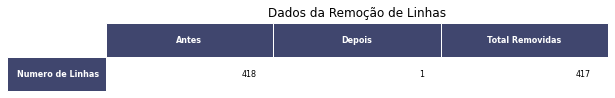

In [8]:
import matplotlib.pyplot as plt
from platiagro.plotting import plot_data_table

infos = pd.DataFrame(data = [[linhas_antes, linhas_depois, linhas_remov]],
                     columns = ['Antes', 'Depois', 'Total Removidas'], 
                     index = ['Numero de Linhas'])


ax = plot_data_table(infos)
plt.title("Dados da Remoção de Linhas")
plt.show()

## Salva resultados da tarefa

A plataforma guarda o conteúdo de `/tmp/data/` para as tarefas subsequentes.<br>
Use essa pasta para salvar modelos, metadados e outros resultados.

In [9]:
# save dataset changes
df.to_csv(dataset, index=False)

In [10]:
from joblib import dump

artifacts = {
    "filter_query": filter_query,
    "columns": list(df.columns),
    "colum_types": list(df.dtypes)
}

dump(artifacts, "/tmp/data/remove-rows.joblib")

['/tmp/data/remove-rows.joblib']